In [69]:
# Import các thư viện thông dụng
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Import các distribution packages từ thư viện scipy
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import t

### Bài 1
Một nhà sản xuất điện thoại kiểm tra chất lượng sản phẩm bằng cách chọn ngẫu nhiên 12 chiếc điện thoại từ mỗi lô sản xuất. Xác suất một chiếc điện thoại bị lỗi là 0.05.


In [70]:
n, p = 12, 0.05

Xác suất để có đúng 2 chiếc điện thoại bị lỗi trong một lần kiểm tra.

In [71]:
print("Xác suất để có đúng 2 chiếc điện thoại bị lỗi trong một lần kiểm tra:", binom.pmf(2, n, p) * 100)

Xác suất để có đúng 2 chiếc điện thoại bị lỗi trong một lần kiểm tra: 9.87915949743324


Xác suất để có ít nhất 1 chiếc điện thoại bị lỗi.

In [72]:
print("Xác suất để có ít nhất 1 chiếc điện thoại bị lỗi:", binom.sf(0, n, p) * 100)

Xác suất để có ít nhất 1 chiếc điện thoại bị lỗi: 45.9639912337363


Vẽ histogram thể hiện phân phối của số điện thoại bị lỗi trên 1000 lần kiểm tra.

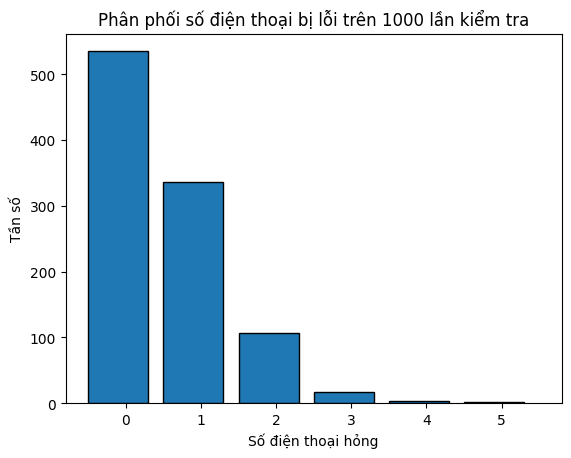

In [73]:
binom_data = binom.rvs(n, p, size=1000)

# bins = int(np.ceil(np.log2(len(binom_data)) + 1)) Liên tục
# Rời rạc
bins=np.arange(min(binom_data), max(binom_data) + 1.5) - 0.5 

plt.hist(binom_data, bins=bins, edgecolor="black", width=0.8)

plt.xlabel('Số điện thoại hỏng')
plt.ylabel('Tần số')
plt.title('Phân phối số điện thoại bị lỗi trên 1000 lần kiểm tra')

plt.show()

### Bài 2:
Một trạm xe buýt có trung bình 4 chuyến xe đến mỗi giờ.

In [74]:
lambda_trips = 4

Xác suất có đúng 6 chuyến xe đến trong một giờ.

In [75]:
print("Xác suất có đúng 6 chuyến xe đến trong một giờ:", poisson.pmf(lambda_trips, 6) * 100)

Xác suất có đúng 6 chuyến xe đến trong một giờ: 13.385261753998332


Vẽ biểu đồ histogram thể hiện phân phối số chuyến xe đến trên 1000 giờ quan sát.


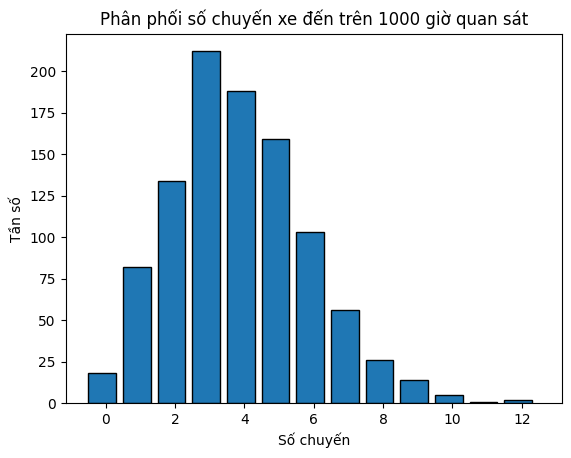

In [76]:
poisson_data = poisson.rvs(lambda_trips, size=1000)

# bins = int(np.ceil(np.log2(len(binom_data)) + 1)) Liên tục
# Rời rạc
bins=np.arange(min(poisson_data), max(poisson_data) + 1.5) - 0.5 

plt.hist(poisson_data, bins=bins, edgecolor="black", width=0.8)

plt.xlabel('Số chuyến')
plt.ylabel('Tần số')
plt.title('Phân phối số chuyến xe đến trên 1000 giờ quan sát')

plt.show()

Chiều cao trung bình của nam sinh viên trong một trường đại học là 175 cm với độ lệch chuẩn 6 cm.

Xác suất một sinh viên có chiều cao hơn 180 cm.

In [77]:
mu = 175
sigma = 6

# print("Xác suất một sinh viên có chiều cao hơn 180 cm:", (1 - norm.cdf(180, loc=mu, scale=sigma)) * 100)
print("Xác suất một sinh viên có chiều cao hơn 180 cm:", norm.sf(180, loc=mu, scale=sigma) * 100)

Xác suất một sinh viên có chiều cao hơn 180 cm: 20.232838096364308


Xác suất một sinh viên có chiều cao trong khoảng 170 cm đến 180 cm.

In [78]:
res = (norm.cdf(180, loc=mu, scale=sigma) - norm.cdf(170, loc=mu, scale=sigma)) * 100

print("Xác suất một sinh viên có chiều cao hơn 180 cm:", res)

Xác suất một sinh viên có chiều cao hơn 180 cm: 59.53432380727137


Vẽ biểu đồ histogram thể hiện phân phối chiều cao của 1000 sinh viên.

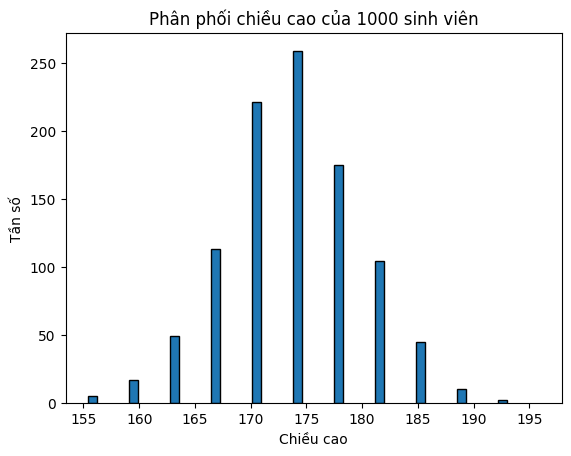

In [79]:
norm_data = norm.rvs(loc=mu, scale=sigma, size=1000)

bins = int(np.ceil(np.log2(len(norm_data)) + 1)) 
# Rời rạc bins=np.arange(min(poisson_data), max(poisson_data) + 1.5) - 0.5 

plt.hist(norm_data, bins=bins, edgecolor="black", width=0.8)

plt.xlabel('Chiều cao')
plt.ylabel('Tần số')
plt.title('Phân phối chiều cao của 1000 sinh viên')

plt.show()

### Bài 1: Đo lường hiệu suất máy kiểm tra lỗi
Một dây chuyền sản xuất có 5% sản phẩm lỗi. Một máy kiểm tra lỗi có độ chính xác như sau:

- Xác suất phát hiện đúng một sản phẩm lỗi: 0.9 (nếu thật sự là sản phẩm lỗi).
- Xác suất báo sai (phát hiện nhầm sản phẩm tốt là lỗi): 0.02.

Công nhân kiểm tra một lô gồm 20 sản phẩm:

In [80]:
n = 20
p_real = 0.05
p_true = 0.9
p_false = 0.02

Tính xác suất có đúng 3 sản phẩm lỗi thực sự trong lô.


In [81]:
print("Xác suất có đúng 3 sản phẩm lỗi thực sự trong lô", binom.pmf(3, n, p_real) * 100)

Xác suất có đúng 3 sản phẩm lỗi thực sự trong lô 5.958214776873279


Tính xác suất máy kiểm tra báo có ít nhất 2 sản phẩm lỗi.

In [82]:
mo_phong = binom.rvs(n, p_real, size=5000)

so_san_pham_loi = binom.rvs(mo_phong, p_true) + binom.rvs(n - mo_phong, p_false)
print("Tính xác suất máy kiểm tra báo có ít nhất 2 sản phẩm lỗi:", np.mean(so_san_pham_loi >= 2))

Tính xác suất máy kiểm tra báo có ít nhất 2 sản phẩm lỗi: 0.3718


Mô phỏng 5000 lô hàng và vẽ biểu đồ thể hiện số sản phẩm bị báo lỗi.


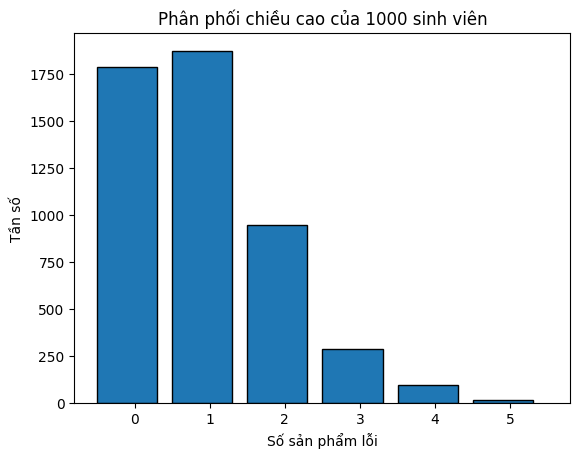

In [83]:
# bins = int(np.ceil(np.log2(len(norm_data)) + 1)) 
bins=np.arange(min(mo_phong), max(mo_phong) + 1.5) - 0.5 

plt.hist(mo_phong, bins=bins, edgecolor="black", width=0.8)

plt.xlabel('Số sản phẩm lỗi')
plt.ylabel('Tần số')
plt.title('Phân phối chiều cao của 1000 sinh viên')

plt.show()

### Bài 2: Phân tích dữ liệu khách hàng đến cửa hàng
Một quán cà phê có trung bình 8 khách đến mỗi giờ vào buổi sáng (8h-12h) và 12 khách mỗi giờ vào buổi chiều (12h-17h).

In [84]:
lambda_morning = 8
morning_hour = 4

lambda_afternoon = 12
afternoon_hour = 5

Tính xác suất có đúng 10 khách đến vào một giờ bất kỳ buổi sáng.

In [85]:
print("Xác suất có đúng 10 khách đến vào một giờ bất kỳ buổi sáng:", poisson.pmf(10, mu=lambda_morning) * 100)

Xác suất có đúng 10 khách đến vào một giờ bất kỳ buổi sáng: 9.926153383153544


Nếu cửa hàng mở từ 8h sáng đến 5h chiều, tính xác suất có hơn 100 khách trong một ngày.


In [86]:
lambda_whole_morning = 8 * 4
lambda_whole_afternoon = 12 * 5

lambda_whole_day = lambda_whole_morning + lambda_whole_afternoon

print("Xác suất có hơn 100 khách trong một ngày:", poisson.sf(100, mu=lambda_whole_day) * 100)

Xác suất có hơn 100 khách trong một ngày: 18.668484733129777


Mô phỏng 1000 ngày làm việc, vẽ biểu đồ số lượng khách mỗi ngày.

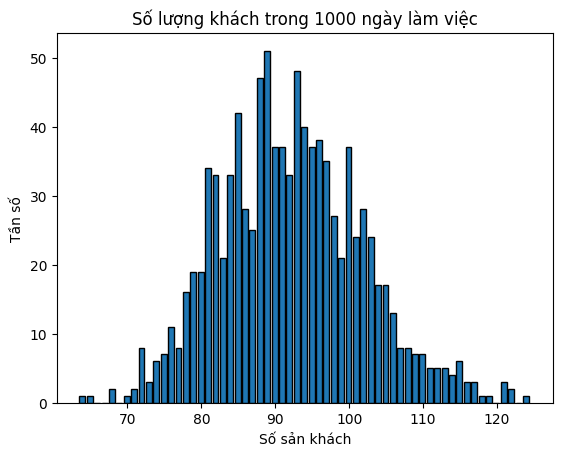

In [87]:
poisson_data = poisson.rvs(mu=lambda_whole_day, size=1000)

# bins = int(np.ceil(np.log2(len(norm_data)) + 1)) 
bins= np.arange(min(poisson_data), max(poisson_data) + 2) - 0.5  

plt.hist(poisson_data, bins=bins, edgecolor="black", width=0.8)

plt.xlabel('Số sản khách')
plt.ylabel('Tần số')
plt.title('Số lượng khách trong 1000 ngày làm việc')

plt.show()

### Bài 3: Phân tích điểm thi đại học
Một kỳ thi có điểm trung bình 70, độ lệch chuẩn 8.



In [88]:
mu = 70
sigma = 8

Tính xác suất một sinh viên đạt trên 85 điểm.


In [91]:
res = norm.sf(85, loc=mu, scale=sigma)

print("Xác suất một sinh viên đạt trên 85 điểm:", res * 100)

Xác suất một sinh viên đạt trên 85 điểm: 3.0396361765261375


Trong một lớp 40 sinh viên, tính xác suất có ít nhất 5 sinh viên đạt trên 85 điểm.

In [93]:
prob_5_above = binom.sf(4, 40, res)

print("Xác suất có ít nhất 5 sinh viên đạt trên 85 điểm:", prob_5_above * 100)

Xác suất có ít nhất 5 sinh viên đạt trên 85 điểm: 0.7040901406901482


Mô phỏng 5000 lớp học, vẽ histogram số sinh viên đạt trên 85 điểm trong mỗi lớp.


Text(0.5, 1.0, 'Số sinh viên đạt trên 85 điểm trong mỗi lớp')

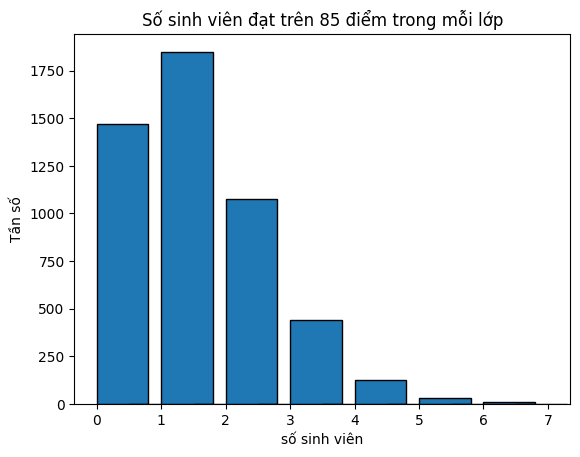

In [95]:
normal_data = binom.rvs(40, res,size=5000)

bins = int(np.ceil(np.log2(len(normal_data)) + 1)) 
# bins= np.arange(min(poisson_data), max(poisson_data) + 2) - 0.5  

plt.hist(normal_data, bins=bins, edgecolor="black", width=0.8)

plt.xlabel('số sinh viên')
plt.ylabel('Tần số')
plt.title('Số sinh viên đạt trên 85 điểm trong mỗi lớp')
